In [192]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

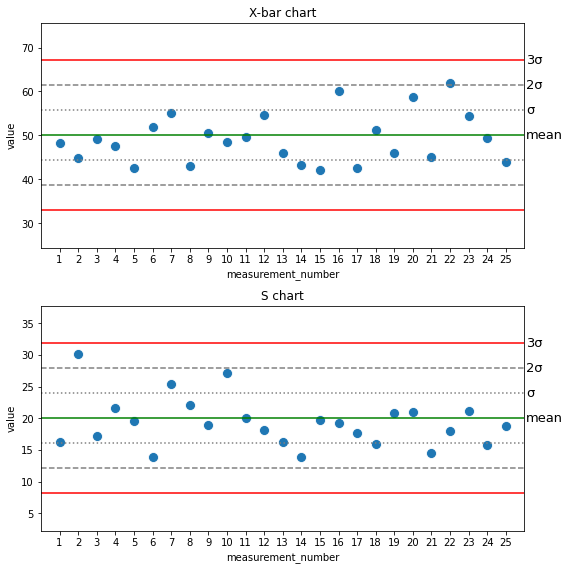

<Figure size 432x288 with 0 Axes>

In [569]:
def xbar_s_control_chart(process_mean, process_std, measurements_number, subgroup_size):
    '''This function shows an xbar_s control chart for an array with random values that are normally distributed.
        The array is generated by the function. Mean, standard deviations and array size are definied by user 
        when calling the function.
        The array is a simulation of a process control. 
        Number of rows of the array corresponds to number of measurements that will be displayed in the chart.
        Number of columns corresponds to the size of a subgroup of a single measurement'''
    
    process_array = np.random.normal(process_mean, process_std,[measurements_number, subgroup_size])

    #calculating mean and standard deviation of every measurement - these will be shown as points on the plot
    measurement_mean = process_array.mean(axis=1)
    measurement_std = process_array.std(axis=1, ddof=1)
    
    #calculating standard deviation of measurements - base for the critical lines on the plot
    std_of_measurement_mean = measurement_mean.std(ddof=1)
    std_of_measurement_std = measurement_std.std(ddof=1)

    #creating the plot
    fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1)
    fig.set_size_inches([8,8])

    plot_range = (process_mean+4.5*std_of_measurement_mean) - (process_mean-4.5*std_of_measurement_mean)

    sns.scatterplot(y=measurement_mean, x=range(process_array.shape[0]), s=100, ax=ax0)
    ax0.set_ylim((process_mean-4.5*std_of_measurement_mean), (process_mean+4.5*std_of_measurement_mean))
    ax0.set_xlim(-1, process_array.shape[0])
    ax0.set_xticks(range(process_array.shape[0]))
    ax0.set_xticklabels(range(1, process_array.shape[0]+1))
    ax0.set_ylabel('value')
    ax0.set_xlabel('measurement_number')
    ax0.set_title('X-bar chart')
    ax0.axhline(process_mean, c='g')
    ax0.axhline(process_mean+3*std_of_measurement_mean, c='r')
    ax0.axhline(process_mean+2*std_of_measurement_mean, c='gray', ls='dashed')
    ax0.axhline(process_mean+1*std_of_measurement_mean, c='gray', ls='dotted')
    ax0.axhline(process_mean-3*std_of_measurement_mean, c='r')
    ax0.axhline(process_mean-2*std_of_measurement_mean, c='gray', ls='dashed')
    ax0.axhline(process_mean-1*std_of_measurement_mean, c='gray', ls='dotted')
    ax0.text(process_array.shape[0]+0.1, process_mean,'mean', fontsize=13, va='center')
    ax0.text(process_array.shape[0]+0.1, process_mean+1*std_of_measurement_mean,'σ', fontsize=13, va='center')
    ax0.text(process_array.shape[0]+0.1, process_mean+2*std_of_measurement_mean,'2σ', fontsize=13, va='center')
    ax0.text(process_array.shape[0]+0.1, process_mean+3*std_of_measurement_mean,'3σ', fontsize=13, va='center')


    plot_range = (std_process_mean+4.5*std_of_measurement_std) - (std_process_mean-4.5*std_of_measurement_std)

    sns.scatterplot(y=measurement_std, x=range(process_array.shape[0]), s=100, ax=ax1)
    ax1.set_ylim((process_std-4.5*std_of_measurement_std), (process_std+4.5*std_of_measurement_std))
    ax1.set_xlim(-1, process_array.shape[0])
    ax1.set_xticks(range(process_array.shape[0]))
    ax1.set_xticklabels(range(1, process_array.shape[0]+1))
    ax1.set_ylabel('value')
    ax1.set_xlabel('measurement_number')
    ax1.set_title('S chart')
    ax1.axhline(process_std, c='g')
    ax1.axhline(process_std+3*std_of_measurement_std, c='r')
    ax1.axhline(process_std+2*std_of_measurement_std, c='gray', ls='dashed')
    ax1.axhline(process_std+1*std_of_measurement_std, c='gray', ls='dotted')
    ax1.axhline(process_std-3*std_of_measurement_std, c='r')
    ax1.axhline(process_std-2*std_of_measurement_std, c='gray', ls='dashed')
    ax1.axhline(process_std-1*std_of_measurement_std, c='gray', ls='dotted')
    ax1.text(process_array.shape[0]+0.1, process_std,'mean', fontsize=13, va='center')
    ax1.text(process_array.shape[0]+0.1, process_std+1*std_of_measurement_std,'σ', fontsize=13, va='center')
    ax1.text(process_array.shape[0]+0.1, process_std+2*std_of_measurement_std,'2σ', fontsize=13, va='center')
    ax1.text(process_array.shape[0]+0.1, process_std+3*std_of_measurement_std,'3σ', fontsize=13, va='center')


    plt.tight_layout(pad=1)
    plt.show()
    plt.savefig('control_chart.png', dpi=600)
    
xbar_s_control_chart(50,20,25,12)